In [158]:
# FIRST QUESTION
# find the 10 countries with most projects

In [172]:
# import libraries

import pandas as pd
import json 
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

In [173]:
#import data

original_json_df = pd.read_json('data/world_bank_projects.json')

In [174]:
# select 'countryshortname' and 'project_name' columns from dataframe 

country_and_project_name = original_json_df[['countryshortname', 'project_name']]
#country_and_project_name.head()

In [175]:
# group projects ('project_name' column) for each country ('countryshortname' column)

by_country = country_and_project_name.groupby('countryshortname')
#by_country.head()

In [176]:
# count projects for each country

counting_projects = by_country.count()['project_name']
#counting_projects

In [177]:
# sort countries by number of projects

sorted_counting_projects = counting_projects.sort_values()
#sorted_counting_projects

In [178]:
# find 10 countries with the most projects

ten_countries_most_projects = sorted_counting_projects.nlargest(10)

In [179]:
# since Africa is not a country, add the country next in line and remove the row with value 'Africa'

by_country_without_africa = counting_projects.nlargest(11).drop('Africa')
by_country_without_africa

countryshortname
China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Morocco               12
Nepal                 12
Mozambique            11
Brazil                 9
Name: project_name, dtype: int64

In [182]:
# change column names in above table (pandas Series)

by_country_without_africa.index.name='country'
ten_countries = by_country_without_africa.reset_index(name='number_of_projects')

# reset index, start with 1

ten_countries.index += 1 
ten_countries


,country,number_of_projects
1,China,19
2,Indonesia,19
3,Vietnam,17
4,India,16
5,"Yemen, Republic of",13
6,Bangladesh,12
7,Morocco,12
8,Nepal,12
9,Mozambique,11
10,Brazil,9


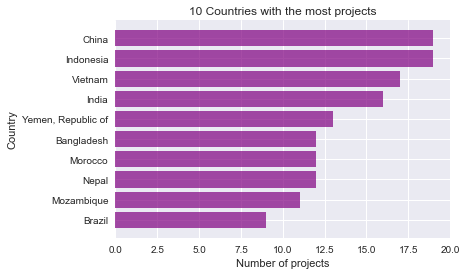

In [181]:
import numpy as np
#import matplotlib.pyplot as plt
 
# define y-axis
y_pos = np.arange(len(ten_countries.country))
index_1 = y_pos[::-1]

# create horizontal bars
plt.barh(index_1, ten_countries.number_of_projects, color='purple', align='center', alpha=0.7)

# Create names on the y-axis
plt.yticks(y_pos[::-1], ten_countries.country)

plt.title('10 Countries with the most projects') 
plt.xlabel('Number of projects')
plt.ylabel('Country')

# set the limit on x-axis
plt.xlim(0,20)

# show graphic
plt.show()